In [80]:
# antes de empezar importamos la librería de NumPy para poder trabajar con todos sus métodos. 
import numpy as np

# importamos la pandas para poder trabajar en la lección
import pandas as pd

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

from itertools import combinations

### Ejercicios estadística descriptiva
En este caso usaremos el mismo DataFrame que hemos estado usando en los últimos pairs. El ejercicio que os planteamos es:
Eres un analista de datos que trabaja para una organización internacional que se enfoca en el desarrollo y el bienestar de los países. Tu objetivo es realizar un análisis inicial de estadísticas descriptivas sobre varios países utilizando el conjunto de datos proporcionado.
- Objetivo: Realizar un análisis de estadísticas descriptivas para comprender mejor la situación de los países en términos de diversos indicadores.

Recuerda proporcionar interpretaciones y conclusiones basadas en los resultados obtenidos en cada paso.

In [4]:
df=pd.read_csv('world_final.csv', index_col=0)

1. Calcula las siguientes estadísticas descriptivas para las variables numéricas:
    - Media
    - Mediana
    - Desviación estándar
    - Mínimo
    - Máximo

In [6]:
variables_numericas = df.select_dtypes(include=['float64', 'int64'])

In [13]:
variables_numericas.describe()

,density,agriculturalland,forestedarea,grossprimaryeducationenrollment,populationlaborforceparticipation,taxrevenue,latitude,longitude,gasolineprice_i,lifeexpectancy_i,landarea_k,armedforcessize_k,birthrate_k,callingcode_k,co2-emissions_k,cpi_k,cpichange_k,fertilityrate_k,gdp_k,grosstertiaryeducationenrollment_k,infantmortality_k,maternalmortalityratio_k,minimumwage_k,outofpockethealthexpenditure_k,population_k,totaltaxrate_k,unemploymentrate_k,urban_population_k
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,194.000000,194.000000,195.000000,195.000000,1.950000e+02,1.950000e+02,195.000000,195.000000,1.950000e+02,195.000000,195.000000,195.000000,1.950000e+02,195.000000,195.000000,195.000000,195.000000,195.000000,1.950000e+02,195.000000,195.000000,1.950000e+02
mean,356.764103,39.134872,32.014872,102.473077,62.710000,16.537436,19.092351,20.232434,1.006369,72.381571,6.896244e+05,1.411286e+05,20.275790,360.546392,1.723727e+05,186.989164,6.626474,2.714996,4.748571e+11,37.060428,21.491245,163.787653,2.152555,32.486960,3.938116e+07,41.061141,6.994576,2.186941e+07
std,1982.888967,21.386637,23.358162,12.912165,9.975707,6.479029,23.961779,66.716110,0.350133,7.385777,1.916650e+06,3.597789e+05,9.873024,322.402259,8.240844e+05,380.364538,23.441717,1.268063,2.161216e+12,28.718024,19.392911,229.154387,2.677302,18.962274,1.447180e+08,20.049304,4.871460,7.451338e+07
min,2.000000,0.600000,0.000000,23.400000,38.000000,0.000000,-40.900557,-175.198242,0.000000,52.800000,0.000000e+00,0.000000e+00,5.900000,1.000000,1.100000e+01,99.030000,-4.300000,0.980000,4.727146e+07,0.800000,1.400000,2.000000,0.010000,0.200000,8.360000e+02,8.000000,0.090000,5.464000e+03
25%,35.500000,22.650000,11.450000,99.350000,57.250000,12.550000,4.544175,-7.941496,0.790000,67.450000,2.445650e+04,7.000000e+03,11.350000,83.000000,2.033500e+03,114.415000,1.000000,1.710000,8.285623e+09,12.150000,6.100000,16.500000,0.505000,17.600000,2.004434e+06,30.900000,3.590000,1.140078e+06
50%,89.000000,39.600000,32.000000,102.550000,62.450000,16.300000,17.273849,20.972652,0.990000,73.200000,1.205380e+05,2.400000e+04,18.180000,256.000000,1.090200e+04,127.630000,2.500000,2.270000,3.438723e+10,28.100000,14.600000,65.000000,1.234000,30.900000,8.877067e+06,37.500000,5.650000,4.418218e+06
75%,216.500000,54.850000,47.450000,107.550000,68.300000,20.300000,40.124603,48.281523,1.185000,77.500000,5.541675e+05,1.250000e+05,28.695000,506.500000,6.294550e+04,158.450000,4.850000,3.580000,2.358901e+11,61.100000,32.800000,204.000000,2.536000,43.850000,2.888532e+07,48.600000,9.224000,1.484924e+07
max,26337.000000,82.600000,98.300000,142.500000,86.800000,37.200000,64.963051,178.065032,2.000000,85.400000,1.709824e+07,3.031000e+06,46.080000,1876.000000,9.893038e+06,4583.710000,254.900000,6.910000,2.142770e+13,136.600000,84.500000,1150.000000,13.590000,81.600000,1.397715e+09,219.600000,28.180000,8.429340e+08


2. Identifica el país con la mayor densidad de población y el país con la menor población en el conjunto de datos.

In [41]:
pais_max=df.loc[df['population_k']==df['population_k'].max(),'country']
pais_max

36    China
Name: country, dtype: object

In [42]:
pais_min=df.loc[df['population_k']==df['population_k'].min(),'country']
pais_min

73    Vatican City
Name: country, dtype: object

3. Calcula la tasa promedio de natalidad (birth_rate) para todos los países en el conjunto de datos.

In [44]:
promedio_natalidad=df['birthrate_k'].mean()
promedio_natalidad

20.27578960792294

4. Realiza un análisis de la mortalidad infantil (infant_mortality) y clasifica los países en tres categorías: baja, moderada y alta mortalidad infantil.

In [75]:
mi_baja=float(np.percentile(df['infantmortality_k'],[25]))
mi_alta=float(np.percentile(df['infantmortality_k'],[75]))
mortalidad_alta=[]
mortalidad_baja=[]
mortalidad_moderada=[]
for pais in df['country']:
    mortalidad_pais=float(df[df['country']==pais]['infantmortality_k'])
    if mortalidad_pais>= mi_alta:
        mortalidad_alta.append(pais)
        #print(f'La mortalidad infaltil del país {pais} es alta')
    elif mortalidad_pais<= mi_baja:
        mortalidad_baja.append(pais)
        #print(f'La mortalidad infaltil del país {pais} es baja')
    else:
        mortalidad_moderada.append(pais)
        #print(f'La mortalidad infaltil del país {pais} es moderada')

C:\Users\salsi\AppData\Local\Temp\ipykernel_27240\2788289556.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mi_baja=float(np.percentile(df['infantmortality_k'],[25]))
C:\Users\salsi\AppData\Local\Temp\ipykernel_27240\2788289556.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mi_alta=float(np.percentile(df['infantmortality_k'],[75]))
C:\Users\salsi\AppData\Local\Temp\ipykernel_27240\2788289556.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mortalidad_pais=float(df[df['country']==pais]['infantmortality_k'])


In [77]:
print(f'La lista de países con mortalidad infantil alta es: {mortalidad_alta}')
print(f'La lista de países con mortalidad infantil baja es: {mortalidad_baja}')
print(f'La lista de países con mortalidad infantil moderada es: {mortalidad_moderada}')

La lista de países con mortalidad infantil alta es: ['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Ivory Coast', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Republic of the Congo', 'Democratic Republic of the Congo', 'Djibouti', 'Dominica', 'Equatorial Guinea', 'Eswatini', 'Ethiopia', 'The Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Kiribati', 'Laos', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar', 'Niger', 'Nigeria', 'North Macedonia', 'Pakistan', 'Papua New Guinea', 'Sierra Leone', 'Somalia', 'South Sudan', 'Sudan', 'Tanzania', 'East Timor', 'Togo', 'Turkmenistan', 'Uganda', 'Yemen', 'Zambia', 'Zimbabwe']
La lista de países con mortalidad infantil baja es: ['Andorra', 'Antigua and Barbuda', 'Australia', 'Austria', 'Bahrain', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Canada', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Gre

5. Calcula la correlación entre las variables de "fertility_rate" y "life_expectancy". Interpreta la relación entre estas dos variables. ¿Qué tipo de correlación hay? Explica la razón de esta relación

In [82]:
lista_var=['fertilityrate_k','life_expectancy_i']
correlacion= list(combinations(lista_var,2))
correlacion

[('fertilityrate_k', 'life_expectancy_i')]

In [90]:
correlation_matrix = df[['fertilityrate_k','lifeexpectancy_i']].corr(numeric_only = True, method = "spearman")
correlation_matrix

,fertilityrate_k,lifeexpectancy_i
fertilityrate_k,1.000000,-0.830914
lifeexpectancy_i,-0.830914,1.000000


Como se puede observar, la correlación es de -0.83, esto nos indica que son variables relacionadas de forma inversa (cuando una aumenta la otra disminuye) y además, al ser un valor cercano a -1 están altamente relacionadas

6. Visualiza la distribución de la variable "cpi" utilizando un histograma y comenta sobre la distribución de los índices de percepción de corrupción.

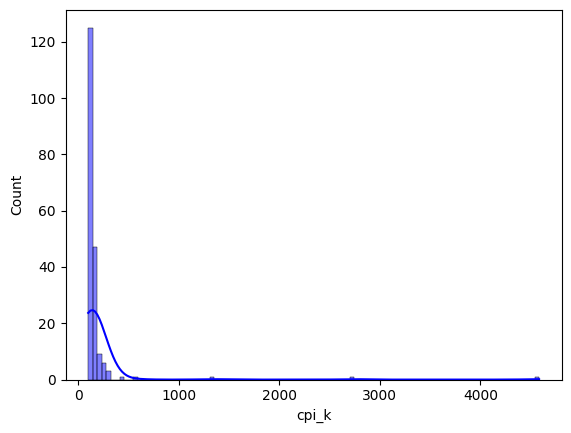

In [95]:
sns.histplot(x = "cpi_k", data = df, color = "blue", kde = True, bins = 100);

Según el histograma, hay muchos países con un bajo valor de cpi, y muy pocos con un alto valor de cpi. La diferencia entre la cantidad de unos y de otros es abismal

7. Encuentra el país con la mayor diferencia entre el "gdp" (Producto Interno Bruto) y el "co2-emissions" (emisiones de dióxido de carbono).

8. Calcula el porcentaje promedio de personas que participan en la fuerza laboral(population_labor_force_participation) para todos los países.

9. Genera un mapa de calor (heatmap) de la matriz de correlación de todas las variables numéricas y discute las relaciones más destacadas.